In [2]:
#Importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Importing the necessary data
df = pd.read_excel('Q4_ADX_Sample_data.xlsx')
print('df',df.shape)
df.head()

df (47935, 12)


,date,pub_id,app_id,ad_unit_code,country,requests,ae_responses,ae_impressions,ae_clicks,ae_revenue,show_rate,click_rate
0,2022-10-20,1987,16243270,22832846443,Tanzania,36,36,34,0,0.035738,0.944444,0.000000
1,2022-10-20,1987,16243270,22832846593,Tanzania,24,24,23,0,0.064384,0.958333,0.000000
2,2022-10-20,1987,16243270,22832846443,Thailand,949,949,876,20,4.943878,0.923077,0.022831
3,2022-10-20,1987,16243270,22832846593,Thailand,1006,907,688,134,24.226836,0.758545,0.194767
4,2022-10-20,1987,16243270,22832827729,Thailand,373,287,156,20,2.759392,0.543554,0.128205


In [4]:
df[['show_rate','click_rate']]=df[['show_rate','click_rate']].round(2)
df.head()

,date,pub_id,app_id,ad_unit_code,country,requests,ae_responses,ae_impressions,ae_clicks,ae_revenue,show_rate,click_rate
0,2022-10-20,1987,16243270,22832846443,Tanzania,36,36,34,0,0.035738,0.94,0.00
1,2022-10-20,1987,16243270,22832846593,Tanzania,24,24,23,0,0.064384,0.96,0.00
2,2022-10-20,1987,16243270,22832846443,Thailand,949,949,876,20,4.943878,0.92,0.02
3,2022-10-20,1987,16243270,22832846593,Thailand,1006,907,688,134,24.226836,0.76,0.19
4,2022-10-20,1987,16243270,22832827729,Thailand,373,287,156,20,2.759392,0.54,0.13


In [5]:
# Checking the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47935 entries, 0 to 47934
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date            47935 non-null  datetime64[ns]
 1   pub_id          47935 non-null  int64         
 2   app_id          47935 non-null  int64         
 3   ad_unit_code    47935 non-null  int64         
 4   country         47515 non-null  object        
 5   requests        47935 non-null  int64         
 6   ae_responses    47935 non-null  int64         
 7   ae_impressions  47935 non-null  int64         
 8   ae_clicks       47935 non-null  int64         
 9   ae_revenue      47935 non-null  float64       
 10  show_rate       47935 non-null  float64       
 11  click_rate      47935 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(7), object(1)
memory usage: 4.4+ MB


In [6]:
# Converting the datatypes from integer to objects
df[['pub_id','app_id','ad_unit_code']]=df[['pub_id','app_id','ad_unit_code']].astype('object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47935 entries, 0 to 47934
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date            47935 non-null  datetime64[ns]
 1   pub_id          47935 non-null  object        
 2   app_id          47935 non-null  object        
 3   ad_unit_code    47935 non-null  object        
 4   country         47515 non-null  object        
 5   requests        47935 non-null  int64         
 6   ae_responses    47935 non-null  int64         
 7   ae_impressions  47935 non-null  int64         
 8   ae_clicks       47935 non-null  int64         
 9   ae_revenue      47935 non-null  float64       
 10  show_rate       47935 non-null  float64       
 11  click_rate      47935 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(4), object(4)
memory usage: 4.4+ MB


In [8]:
# Inspecting the null values in the dataset
df.isnull().sum()

date                0
pub_id              0
app_id              0
ad_unit_code        0
country           420
requests            0
ae_responses        0
ae_impressions      0
ae_clicks           0
ae_revenue          0
show_rate           0
click_rate          0
dtype: int64

In [9]:
df.describe()

,requests,ae_responses,ae_impressions,ae_clicks,ae_revenue,show_rate,click_rate
count,47935.000000,47935.000000,47935.000000,47935.000000,47935.000000,47935.000000,47935.000000
mean,585.827808,516.918202,257.055137,13.502514,2.098320,0.601824,0.064486
std,3024.686475,2579.695718,1294.313552,73.922916,27.784254,0.236538,0.082409
min,16.000000,16.000000,16.000000,0.000000,0.000111,0.080000,0.000000
25%,50.000000,47.000000,27.000000,0.000000,0.026047,0.410000,0.000000
50%,109.000000,100.000000,52.000000,2.000000,0.112968,0.560000,0.040000
75%,300.000000,275.000000,140.000000,7.000000,0.537878,0.830000,0.100000
max,156435.000000,156296.000000,69448.000000,6853.000000,2137.181915,1.000000,0.860000


In [10]:
#Creating a day calumn from date column to make easier day wise analysis
df['day']=df['date'].dt.day
df.head()

,date,pub_id,app_id,ad_unit_code,country,requests,ae_responses,ae_impressions,ae_clicks,ae_revenue,show_rate,click_rate,day
0,2022-10-20,1987,16243270,22832846443,Tanzania,36,36,34,0,0.035738,0.94,0.00,20
1,2022-10-20,1987,16243270,22832846593,Tanzania,24,24,23,0,0.064384,0.96,0.00,20
2,2022-10-20,1987,16243270,22832846443,Thailand,949,949,876,20,4.943878,0.92,0.02,20
3,2022-10-20,1987,16243270,22832846593,Thailand,1006,907,688,134,24.226836,0.76,0.19,20
4,2022-10-20,1987,16243270,22832827729,Thailand,373,287,156,20,2.759392,0.54,0.13,20


In [11]:
df['day']=df['day'].astype('object')

### EDA on requests

In [12]:
df.groupby('app_id')['requests'].sum().sort_values(ascending=False).reset_index()

,app_id,requests
0,22693095,10349859
1,47862278,5965420
2,43840611,3014066
3,63338696,2845293
4,40931528,2612285
5,95674771,1211485
6,66981243,998870
7,84650721,853355
8,16243270,144079
9,25596802,86944


##### The number of requests from app_id 22693095 is way higher than the other apps,almost 75% more than the second top app_id which seems odd.This could be an anomaly.

<AxesSubplot:xlabel='day'>

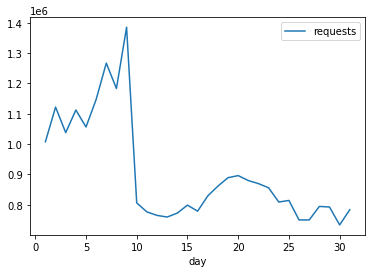

In [13]:
df.groupby('day')['requests'].sum().reset_index().sort_values('day').plot(x='day')

##### As you can see from the above chart,the number of requests were pretty good and were rising for the first 9 days, but there was a heavy dip in the number of requests on the 10th day and from there it did not rise much for the whole month.This could be an anomaly.

In [14]:
app_day_req=df.groupby(['app_id','day'])['requests'].sum().reset_index().sort_values('day')
app_day_req

,app_id,day,requests
118,47862278,1,194426
174,66981243,1,206898
87,43840611,1,95273
15,22693095,1,311123
185,84650721,1,24942
...,...,...,...
45,22693095,31,414665
76,25596802,31,3899
148,47862278,31,201536
215,84650721,31,23750


In [15]:
app_day_req['app_id']=app_day_req['app_id'].astype('category')
app_day_req['day']=app_day_req['day'].astype('category')

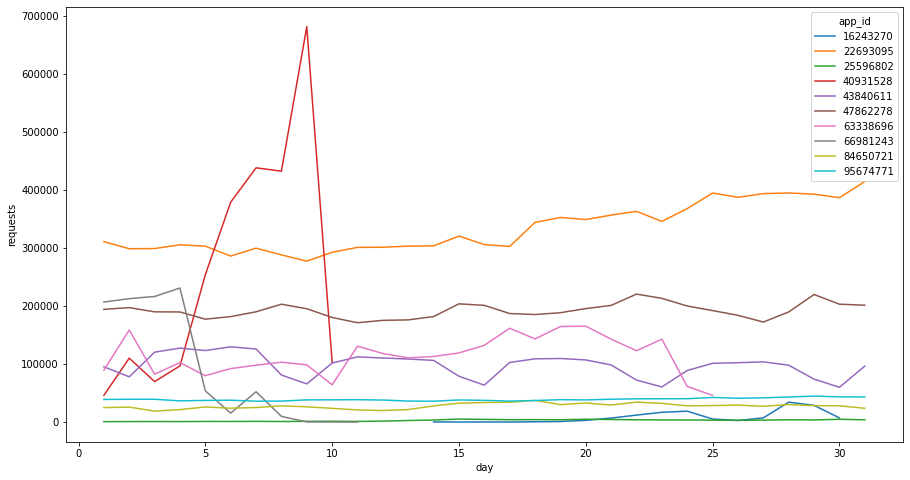

In [16]:
plt.figure(figsize = (15,8))
sns.lineplot(y = 'requests', x = 'day', data = app_day_req, hue = 'app_id')
plt.show()

##### As we can see from the above chart the dip on the 10th day was caused by app_id 40931528, which also stopped the requests after 10th. This could be caused maybe due to a technical issue or it may be a fraudulent activity and the app being a scam.

In [17]:
# Looking at number of days the apps had requests
df.groupby('app_id')['day'].nunique()

app_id
16243270    15
22693095    31
25596802    31
40931528    10
43840611    31
47862278    31
63338696    25
66981243    11
84650721    31
95674771    31
Name: day, dtype: int64

In [18]:
app_day_req[app_day_req.app_id==40931528]

,app_id,day,requests
77,40931528,1,45986
78,40931528,2,110170
79,40931528,3,69811
80,40931528,4,96818
81,40931528,5,254134
82,40931528,6,379176
83,40931528,7,438446
84,40931528,8,432650
85,40931528,9,681861
86,40931528,10,103233


In [19]:
app_day_req[app_day_req.app_id==66981243]

,app_id,day,requests
174,66981243,1,206898
175,66981243,2,212828
176,66981243,3,216550
177,66981243,4,231105
178,66981243,5,53772
179,66981243,6,15378
180,66981243,7,52230
181,66981243,8,9761
182,66981243,9,195
183,66981243,10,119


##### This app_id 66981243 has declined graduallly over time but not like the other app with a sudden drop.

### EDA on responses

In [20]:
df.groupby('app_id')[['requests','ae_responses']].sum().sort_values('requests',ascending=False).reset_index()

,app_id,requests,ae_responses
0,22693095,10349859,9459787
1,47862278,5965420,4674814
2,43840611,3014066,2937129
3,63338696,2845293,1975614
4,40931528,2612285,2533914
5,95674771,1211485,1182134
6,66981243,998870,964582
7,84650721,853355,824285
8,16243270,144079,140361
9,25596802,86944,85854


<AxesSubplot:xlabel='day'>

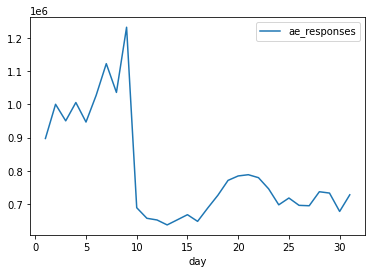

In [21]:
df.groupby('day')['ae_responses'].sum().reset_index().sort_values('day').plot(x='day')

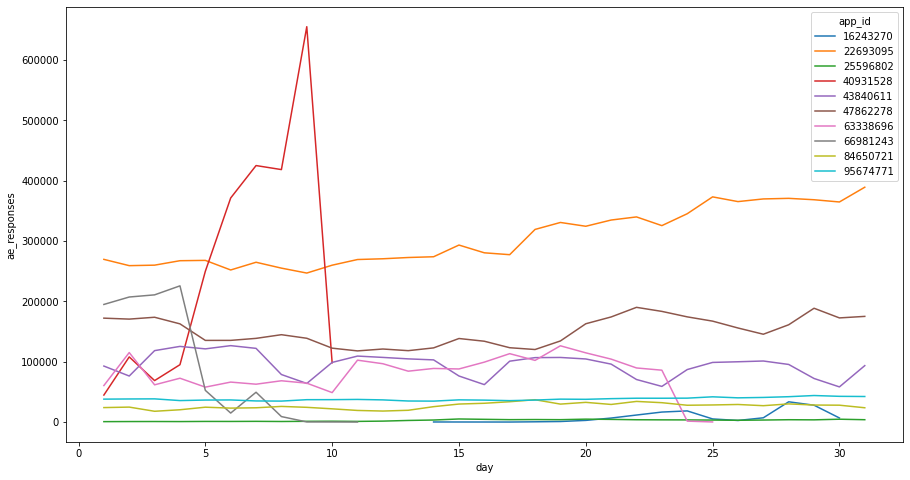

In [22]:
app_day_res=df.groupby(['app_id','day'])['ae_responses'].sum().reset_index().sort_values('day')
app_day_res

app_day_res['app_id']=app_day_res['app_id'].astype('category')
app_day_res['day']=app_day_res['day'].astype('category')

plt.figure(figsize = (15,8))
sns.lineplot(y = 'ae_responses', x = 'day', data = app_day_res, hue = 'app_id')
plt.show()

##### As we saw with requests, in responses also the drop is reflected as it should be since this is caused due to the app_id 40931528

### EDA on impressions , clicks , revenue and other metrics

In [23]:
agg=df.groupby('app_id')[['requests','ae_responses','ae_impressions','ae_clicks','ae_revenue']].sum().sort_values('requests',ascending=False).reset_index()
agg['show_rate']=(agg['ae_impressions']/agg['ae_responses']).round(2)
agg['click_rate']=(agg['ae_clicks']/agg['ae_impressions']).round(2)
agg

,app_id,requests,ae_responses,ae_impressions,ae_clicks,ae_revenue,show_rate,click_rate
0,22693095,10349859,9459787,3524462,359318,51191.627809,0.37,0.10
1,47862278,5965420,4674814,3150826,27628,3191.668051,0.67,0.01
2,43840611,3014066,2937129,1157692,34894,5373.715967,0.39,0.03
3,63338696,2845293,1975614,1124600,40869,3269.125146,0.57,0.04
4,40931528,2612285,2533914,1096917,15626,21900.482256,0.43,0.01
5,95674771,1211485,1182134,754469,35976,2868.401602,0.64,0.05
6,66981243,998870,964582,676995,41647,2077.719197,0.70,0.06
7,84650721,853355,824285,650202,80681,2387.244188,0.79,0.12
8,16243270,144079,140361,113944,2703,4245.317619,0.81,0.02
9,25596802,86944,85854,71831,7901,4077.663850,0.84,0.11


##### We can see from the above data that the app_id 22693095 is the app with highest requests and responses but the impressions are a bit low comparitively and therefore having one of the lowest show-rate among these apps.Even though the show rate is less,the click-rate is one of the best among these apps thereby generating good amount of revenue.

##### Also for the app_id 40931528 where we found the abnormal dip in requests, the above data shows that it has generated a very good amount of revenue eventhough the click_rate is low. Infact it has generated the second highest revenue among all these apps,so the sudden drop of this app could be some anomaly

<AxesSubplot:xlabel='day'>

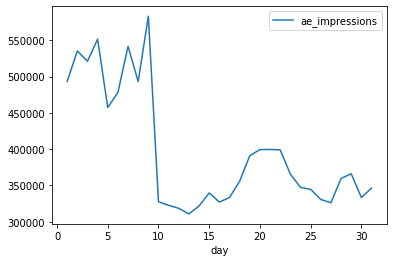

In [24]:
df.groupby('day')['ae_impressions'].sum().reset_index().sort_values('day').plot(x='day')

<AxesSubplot:xlabel='day'>

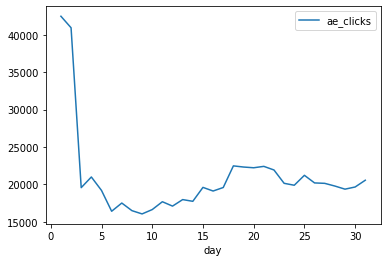

In [25]:
df.groupby('day')['ae_clicks'].sum().reset_index().sort_values('day').plot(x='day')

<AxesSubplot:xlabel='day'>

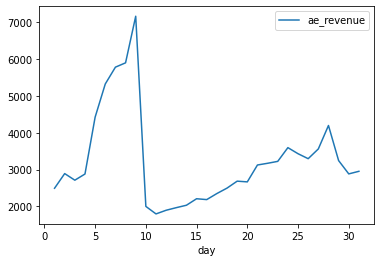

In [26]:
df.groupby('day')['ae_revenue'].sum().reset_index().sort_values('day').plot(x='day')

##### As we can see from the above charts,if we look at a day wise distribution then all the metrics are following a same pattern with a sudden dip on 10th of the month except clicks which were very high during the first 2 days but then had a fall on 3rd day and became almost half and remained almost constant for the rest of the months which is kind of an anomaly.

In [27]:
df.groupby('day')['ae_clicks'].sum().reset_index().sort_values('day')

,day,ae_clicks
0,1,42464
1,2,40925
2,3,19563
3,4,20987
4,5,19191
5,6,16409
6,7,17506
7,8,16489
8,9,16053
9,10,16633


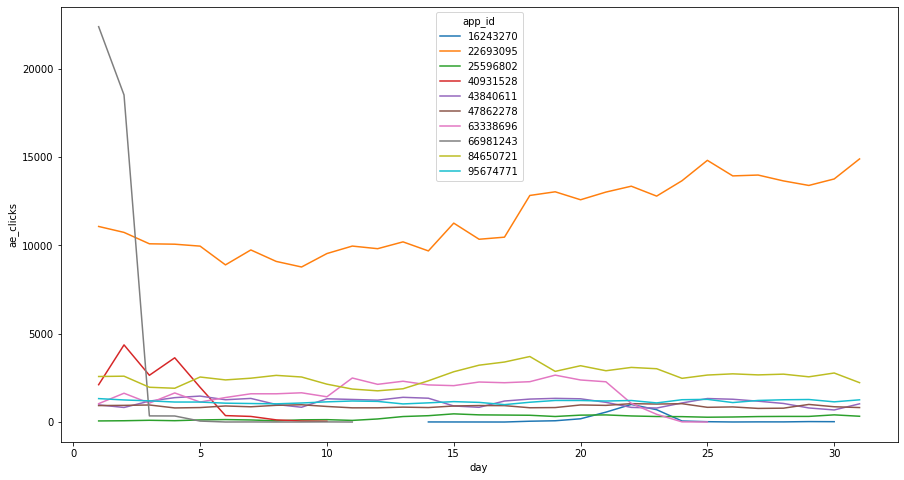

In [28]:
app_day_res=df.groupby(['app_id','day'])['ae_clicks'].sum().reset_index().sort_values('day')
app_day_res

app_day_res['app_id']=app_day_res['app_id'].astype('category')
app_day_res['day']=app_day_res['day'].astype('category')

plt.figure(figsize = (15,8))
sns.lineplot(y = 'ae_clicks', x = 'day', data = app_day_res, hue = 'app_id')
plt.show()

In [29]:
app_day_res[app_day_res.app_id==66981243]

,app_id,day,ae_clicks
174,66981243,1,22376
175,66981243,2,18512
176,66981243,3,347
177,66981243,4,342
178,66981243,5,54
179,66981243,6,2
180,66981243,7,5
181,66981243,8,0
182,66981243,9,1
183,66981243,10,7


##### We can observe that the app_id 66981243 is the one with very high number of clicks on initial 2 days but had a sudden drop.

#### By analyzing the data in detail, we can identify such anomalies and take appropriate actions to optimize ad placements,fix technical issues and increase revenue.

In [30]:
### End